## Problem Statement:
    
The k-nearest neighbors algorithm, sometimes referred to as KNN or k-NN, is a non-parametric, supervised learning 
classifier that relies on closeness to produce classifications or predictions about the grouping of a single data 
point. It can be applied to classification or regression issues, although it is most frequently employed as a 
classification technique because it relies on the idea that comparable points can be discovered close to one another.

We need to try some values to find best value for K, however, K=5 is preferred because lower than that can be noisy
and lead to outliers in the model which does not hold good.

Here, it is a KNN Classifier problem where given the values, finds the K nearest objects to the query object. 
Basically finding the locations of points that are closer to the query point than any other point in the set is the 
difficulty. Using matplotlib we tried to plot the graph and visualize the positions of the point that is near to 
the query point.


In [1]:
# Assignment 4 !!!!

import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats
import numpy as np

# Values in the form of arrays, from the ppt
x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12] 
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21] 
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1] 

# Here we are printing the x, y values together as co-oridates in the graph
data = list(zip(x, y)) 
data


[(4, 21),
 (5, 19),
 (10, 24),
 (4, 17),
 (3, 16),
 (11, 25),
 (14, 24),
 (8, 22),
 (10, 21),
 (12, 21)]

In [2]:
# Based on the document scores and target class, we fit KNN method for 3 nearest neighbor: 

knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(data, classes) 


KNeighborsClassifier(n_neighbors=3)

In [3]:
# Based on the document scores and target class, we fit KNN method for 1 nearest neighbor: 

knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(data, classes) 

KNeighborsClassifier(n_neighbors=1)

In [4]:
# You can compute the mode using the SciPy mode() function

scipy.stats.mode(classes)

ModeResult(mode=array([0]), count=array([5]))

In [5]:
# take new X and Y arrays values, then redict knn on new document score to obtain a class of 0 or 1
# Basically applying same KNN object to identify the class of new, unforeseen documents

new_x = 8 
new_y = 21 
new_point = [(new_x, new_y)] 
prediction = knn.predict(new_point) 
print(prediction) 



[0]


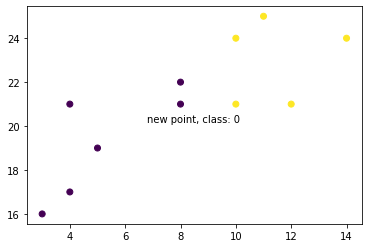

In [6]:
# plotting graph

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]]) 
plt.text(x=new_x-1.2, y=new_y-0.8, s=f"new point, class: {prediction[0]}") 
plt.show() 



In [7]:
# when we vary the number of neighbors to 5, the number of scores used to classify our new document score changes 

knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(data, classes) 
prediction = knn.predict(new_point) 
print(prediction) 



[1]


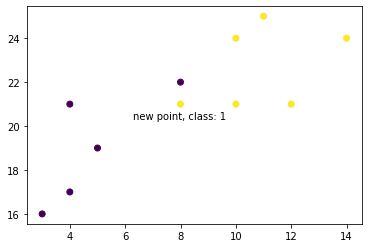

In [8]:
# plotting graph

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]]) 
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}") 
plt.show() 

In [9]:
# Change of code and dataset

### Supervised Learning :
It is the learning where the value or result that we want to predict is within the training data (labeled data) and the value which is in data that we want to study is known as Target or Dependent Variable or Response

Supervised Learning is classified into two categories:

Classification: Here our target variable consists of the categories. Regression: Here our target variable is continuous and we usually try to find out the line of the curve.

Larger k value means smother curves of separation resulting in less complex models. Whereas, smaller k value tends to overfit the data and resulting in complex models.

Note: It’s very important to have the right k-value when analyzing the dataset to avoid overfitting and underfitting of the dataset.

Using the k-nearest neighbor algorithm we fit the historical data (or train the model) and predict the future.

In the example shown below following steps are performed:

The k-nearest neighbor algorithm is imported from the scikit-learn package.
Create feature and target variables.
Split data into training and test data.
Generate a k-NN model using neighbors value.
Train or fit the data into the model.
Predict the future.
Import necessary modules

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
  
# Loading data
irisData = load_iris()
  
# Create feature and target arrays
x = irisData.data
y = irisData.target
  
# Split into training and test set (0.2 means 20% data considered as test data)
x_train, x_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)
  
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(x_train, y_train)
  
# Predict on dataset which model has not seen before
print(knn.predict(x_test))

# We have seen how we can use K-NN algorithm to solve the supervised machine learning problem above. 
# But how to measure the accuracy of the model?
# Consider an example shown below where we predicted the performance of the above model:
    
# Calculate the accuracy of the model
print(knn.score(x_test, y_test))


[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
0.9666666666666667


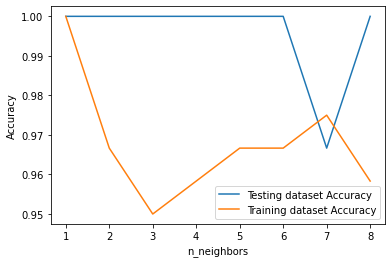

In [13]:
# To obtain model accuracy
# So far so good. But how to decide the right k-value for the dataset? Obviously, 
# we need to be familiar to data to get the range of expected k-value, 
# but to get the exact k-value we need to test the model for each and every expected k-value. 
# Refer the below example.

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()